In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import sys
sys.path.append("../src/")
import data_loader as dl
CLOCK = 12.5
DRIFT_VEL = 5.2

In [ ]:
file = h5py.File("../data/clean/runs/clean_run_0210.h5", "r")

In [ ]:
dataset = file["/clean"]

In [ ]:
n_events = len(dataset)
print(n_events)

In [ ]:
disc = np.load("../data/clean/discarded/discarded_events_0130.npy")
disc.shape

In [ ]:
for i in dataset:
    dataset[str(i)]

In [ ]:
#xyz = dataset["6745"]
xyz = dataset[str(1567)]
a = np.array(xyz)
to_del = []

filtered_1 = a[a[:, 6] > 100]
filtered_2 = a[(a[:, 2]*DRIFT_VEL/CLOCK) > 1250]
filtered_3 = a[a[:, 5] < -1e-12]

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12, 20))
#ax.scatter(a[:,0], a[:,1])
ax[0][0].scatter(filtered_1[:,0], filtered_1[:,1], c="r", alpha=0.8)
ax[0][1].scatter(a[:,0], a[:,1], alpha=0.8)
ax[1][0].scatter(filtered_2[:,0], filtered_2[:,1], c="g", alpha=0.4)
ax[1][1].scatter(a[:,0], a[:,1], alpha=0.8)
ax[2][0].scatter(filtered_3[:,0], filtered_3[:,1], c="brown", alpha=0.4)
ax[2][1].scatter(a[:,0], a[:,1], alpha=0.8)

for a_ in ax:
    for i in a_:
        i.set_ylim((-275, 275)) 
        i.set_xlim((-275, 275))

In [ ]:
len(filtered_3)

In [ ]:
plt.scatter(filtered_3[:,0], filtered_3[:,1])
plt.ylim((-275, 275)) 
plt.xlim((-275, 275))

In [ ]:
import pandas as pd
labels_run = pd.read_csv("../labels/run_0130_labels.csv")
index_labels = labels_run["evt_id"].values.astype(str)

In [ ]:
labels_run.head()

In [ ]:
from joblib import Parallel, delayed 

an_array = np.zeros(400)

def func(i):
    print("what?")
    an_array[i] = 45
    
_ = Parallel(n_jobs=4)(delayed(func)(i) for i in range(len(an_array)))

In [5]:
data = "real"
#og = np.load("../data/{}/images/run_0210_label_True_size_128.npy".format(data))
#og_y = np.load("../data/{}/targets/run_0210_targets_size_128.npy".format(data))
_, og, og_y = dl.load_simulated("128")
og_y = og_y if len(og_y.shape) == 1 else og_y.argmax(1)
#vgg = np.load("../data/clean/vgg_images/run_0210_label_False_size_128.npy")

(2400, 16384)
Class :  0
Class :  1


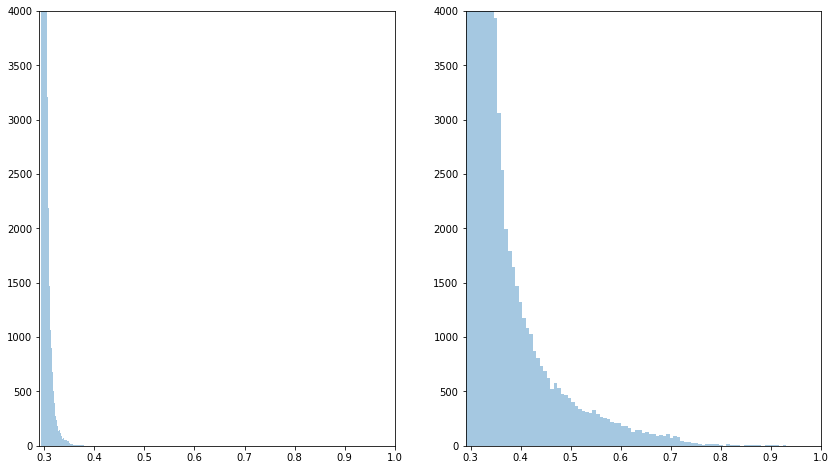

In [20]:
fig, ax = plt.subplots(ncols=len(np.unique(og_y)), figsize=(14, 8))
og_flat = og.reshape((og.shape[0], -1))
print(og_flat.shape)

for c in np.unique(og_y):
    print("Class : ", c)
    w = og_y == c
    signal_x = og_flat[w, :].ravel()
    min_v = 2.9e-1
    signal_x = signal_x[signal_x > min_v]
    
    sns.distplot(signal_x, ax=ax[c], kde=False, bins=100)
    ax[c].set_ylim((0, 4000))
    ax[c].set_xlim((min_v, 1))

In [20]:
hist = np.load("../data/real/q_histograms/run_0210_label_True_size_128.npy")
net_charge = np.load("../data/real/net_charge/run_0210_label_True_size_128.npy")
targ = np.load("../data/real/targets/run_0210_targets_size_128.npy")
#hist = hist*net_charge.reshape((-1, 1))

In [4]:
net_charge.shape

(1774,)

In [56]:
hist.shape

(1774, 40)

In [13]:
net_charge.min()

0.05897154513896632

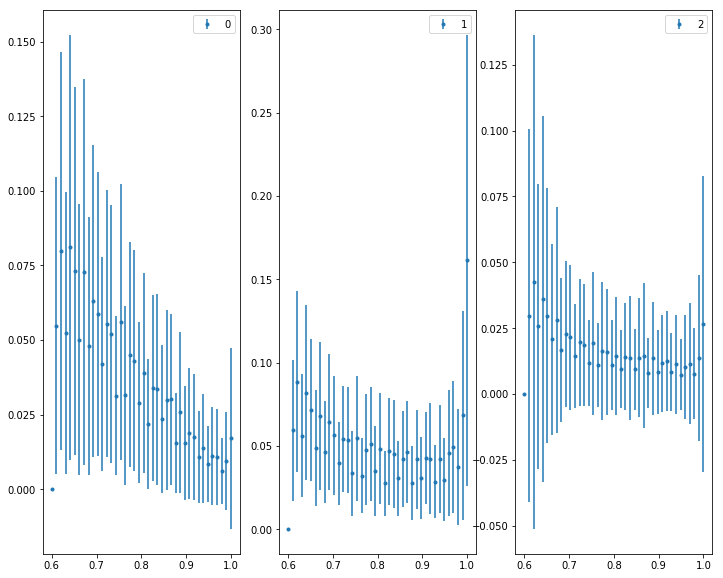

In [24]:
x = np.linspace(0.6, 1, 40)
#print(sum(hist[w]))
fig, ax = plt.subplots(ncols=len(np.unique(targ)), figsize=(12, 10))

for c in np.unique(targ):
    all_c = targ == c
    evt_c = hist[all_c]
    mean_c = evt_c.mean(0)
    std_c = evt_c.std(0)
    #print(mean_c.shape, std_c.shape, x.shape, evt_c.shape)
    
    ax[c].errorbar(x, mean_c, yerr=std_c, fmt= ".", label=c)
    #ax[c].set_ylim((0, 0.1))

    ax[c].legend()

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score

xtr, xte, ytr, yte = train_test_split(hist, targ)
lr = LogisticRegression(multi_class="multinomial", class_weight="balanced", solver="newton-cg", penalty="l2")
s = cross_val_score(lr, xtr, ytr, cv=4)
lr.fit(xtr, ytr)
print(s)

[0.74251497 0.74698795 0.77409639 0.7439759 ]


In [34]:
f1_score(yte, lr.predict(xte), average=None)

array([0.71111111, 0.61417323, 0.83208955])

In [ ]:
sim = np.load("../data/simulated/images/pr_train_simulated.npy")

In [ ]:
plt.imshow(np.squeeze(targets[w6]))

In [ ]:
print(targets.shape)
print(vgg.shape)

In [ ]:
evt_type = "real"
evts = np.load("../data/"+evt_type+"/images/run_0210_label_True_size_80.npy")
targets = np.load("../data/"+evt_type+"/targets/run_0210_targets_size_80.npy")
labelled_disc = np.load("../data/"+evt_type+"/discarded/discarded_events_0210_label_True.npy")
print("n labelled: ", targets.size)
print("discarded labelled: ", labelled_disc.size)

In [ ]:
ev_id = 
plt.imshow(evts[ev_id].reshape((49, 49)))
print("event TYPE: ",targets[ev_id])
#plt.gca().axis("off")

In [ ]:
class_type = evts[targets==2]
print("mean ", class_type[class_type>0].mean())
print("std ", class_type[class_type>0].std())

In [ ]:
plt.bar(np.arange(3), np.bincount(targets),)

In [ ]:
np.bincount(targets)

In [ ]:
np.load("../data/clean/targets/train_targets_size_50.npy").shape